# Data Analytics with Python – Fundamentals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DataFrame vs. Series

In [ ]:
# Students write ONLY this!
df = pd.read_csv("vgsales.csv")

In [3]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
type(df)

pandas.core.frame.DataFrame

In [7]:
type(df["Name"])

pandas.core.series.Series

In [8]:
df["Name"]

0                                              Wii Sports
1                                       Super Mario Bros.
2                                          Mario Kart Wii
3                                       Wii Sports Resort
4                                Pokemon Red/Pokemon Blue
                               ...                       
16286                  Woody Woodpecker in Crazy Castle 5
16287                       Men in Black II: Alien Escape
16288    SCORE International Baja 1000: The Official Game
16289                                          Know How 2
16290                                    Spirits & Spells
Name: Name, Length: 16291, dtype: object

## Inspecting Data in Pandas

In [9]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16286,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  int64  
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global Sales  16291 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.2+ MB


In [12]:
df.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global Sales    0
dtype: int64

In [18]:
df.describe().drop(columns="Year")

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,0.265647,0.147731,0.078833,0.048426,0.540910
std,0.822432,0.509303,0.311879,0.190083,1.567345
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


In [17]:
df.select_dtypes("number").agg(["mean", "std", "median", "var"])

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
mean,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
median,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
var,34.017032,0.676395,0.259389,0.097269,0.036131,2.456569


In [19]:
df.describe(include="O")

,Name,Platform,Genre,Publisher
count,16291,16291,16291,16291
unique,11325,31,12,576
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2131,3251,1339


## Selecting Columns in Pandas

In [20]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global Sales'],
      dtype='object')

In [21]:
# The best syntax
df["Genre"]

0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16286        Platform
16287         Shooter
16288          Racing
16289          Puzzle
16290        Platform
Name: Genre, Length: 16291, dtype: object

In [22]:
# The lazy way
df.Genre

0              Sports
1            Platform
2              Racing
3              Sports
4        Role-Playing
             ...     
16286        Platform
16287         Shooter
16288          Racing
16289          Puzzle
16290        Platform
Name: Genre, Length: 16291, dtype: object

In [23]:
df.Global Sales

SyntaxError: invalid syntax (3833318615.py, line 1)

In [24]:
df["Global Sales"]

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16286     0.01
16287     0.01
16288     0.01
16289     0.01
16290     0.01
Name: Global Sales, Length: 16291, dtype: float64

In [25]:
# Selecting more than one column
# Pass a list of strings

df[["Name", "Year", "Global Sales"]]

,Name,Year,Global Sales
0,Wii Sports,2006,82.74
1,Super Mario Bros.,1985,40.24
2,Mario Kart Wii,2008,35.82
3,Wii Sports Resort,2009,33.00
4,Pokemon Red/Pokemon Blue,1996,31.37
...,...,...,...
16286,Woody Woodpecker in Crazy Castle 5,2002,0.01
16287,Men in Black II: Alien Escape,2003,0.01
16288,SCORE International Baja 1000: The Official Game,2008,0.01
16289,Know How 2,2010,0.01


## Methods vs. Attributes

In [28]:
# methods always have a parenthesis
# methods will change the current state of an object
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [30]:
# Attributes never have a parathesis
# attributes will provide information about the current state of an object

df.shape

(16291, 10)

In [31]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global Sales'],
      dtype='object')

## Intuition or Common Sense in Pandas

In [32]:
year = df["Year"]

In [33]:
type(year)

pandas.core.series.Series

In [34]:
type(df)

pandas.core.frame.DataFrame

In [35]:
df.shape

(16291, 10)

In [36]:
year.shape

(16291,)

In [37]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global Sales'],
      dtype='object')

In [38]:
year.columns

AttributeError: 'Series' object has no attribute 'columns'

In [39]:
year.index

RangeIndex(start=0, stop=16291, step=1)

In [43]:
year.value_counts()#.sort_index()

Year
2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
2012     655
2015     614
2014     580
2013     546
2001     482
1998     379
2000     349
2016     342
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: count, dtype: int64

In [46]:
for col in df.columns:
    print(df[col].value_counts())
    print()

Name
Need for Speed: Most Wanted    12
FIFA 14                         9
Ratatouille                     9
LEGO Marvel Super Heroes        9
Cars                            8
                               ..
PGA Tour 96                     1
Game & Wario                    1
Angry Birds                     1
Shadow Hearts: Covenant         1
Know How 2                      1
Name: count, Length: 11325, dtype: int64

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

Year
2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
2012 

In [47]:
year.sort_values()

257      1980
6211     1980
1948     1980
5282     1980
1746     1980
         ... 
5205     2016
14136    2017
16135    2017
15944    2017
5860     2020
Name: Year, Length: 16291, dtype: int64

In [48]:
df["Platform"].sort_values()

3002     2600
3075     2600
2766     2600
8602     2600
1151     2600
         ... 
9847     XOne
8418     XOne
14478    XOne
1468     XOne
13529    XOne
Name: Platform, Length: 16291, dtype: object

In [51]:
df.sort_values(by="Year", inplace=True)

In [55]:
df.reset_index(drop=True, inplace=True)

In [58]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
2,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
3,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
4,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...
16286,Star Fox: Zero,WiiU,2016,Shooter,Nintendo,0.16,0.10,0.07,0.03,0.35
16287,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16288,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
16289,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


## Method Chaining

<Axes: xlabel='Genre'>

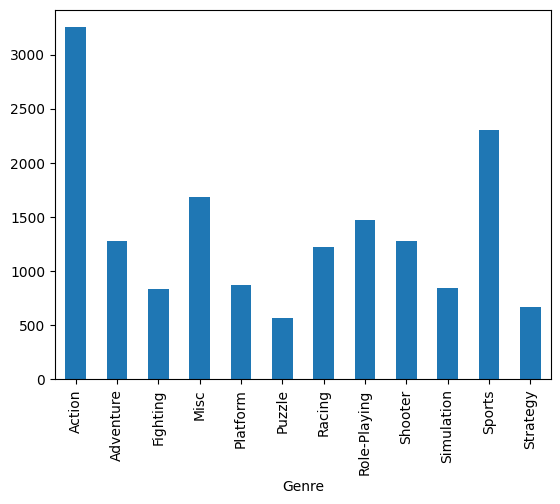

In [64]:
df["Genre"].value_counts().sort_index().plot.bar()

## loc[] & iloc[]

In [66]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
2,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
3,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
4,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...
16286,Star Fox: Zero,WiiU,2016,Shooter,Nintendo,0.16,0.10,0.07,0.03,0.35
16287,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16288,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
16289,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


In [65]:
df.iloc[4]

Name               Kaboom!
Platform              2600
Year                  1980
Genre                 Misc
Publisher       Activision
NA_Sales              1.07
EU_Sales              0.07
JP_Sales               0.0
Other_Sales           0.01
Global Sales          1.15
Name: 4, dtype: object

In [67]:
# [start:stop] , stop is exclusive (we don't include row 5)
df.iloc[:5]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.0,0.00,0.27
2,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
3,Freeway,2600,1980,Action,Activision,0.32,0.02,0.0,0.00,0.34
4,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15


In [68]:
df.loc[4]

Name               Kaboom!
Platform              2600
Year                  1980
Genre                 Misc
Publisher       Activision
NA_Sales              1.07
EU_Sales              0.07
JP_Sales               0.0
Other_Sales           0.01
Global Sales          1.15
Name: 4, dtype: object

In [69]:
# [start:stop] but with loc the stop is inclusive
df.loc[:5]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.0,0.00,0.27
2,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
3,Freeway,2600,1980,Action,Activision,0.32,0.02,0.0,0.00,0.34
4,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
5,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.0,0.00,0.24


In [71]:
# selecting both rows and columns
#   rows first, columns second!
# [start:stop, start:stop]
df.iloc[:100, 2:6]

,Year,Genre,Publisher,NA_Sales
0,1980,Shooter,Atari,4.00
1,1980,Misc,Activision,0.25
2,1980,Misc,Atari,0.99
3,1980,Action,Activision,0.32
4,1980,Misc,Activision,1.07
...,...,...,...,...
95,1983,Action,Activision,0.27
96,1983,Platform,Nintendo,0.51
97,1983,Misc,Nintendo,0.01
98,1983,Platform,Nintendo,0.23


In [72]:
df.iloc[:100, [1,2,3,4]]

,Platform,Year,Genre,Publisher
0,2600,1980,Shooter,Atari
1,2600,1980,Misc,Activision
2,2600,1980,Misc,Atari
3,2600,1980,Action,Activision
4,2600,1980,Misc,Activision
...,...,...,...,...
95,2600,1983,Action,Activision
96,NES,1983,Platform,Nintendo
97,NES,1983,Misc,Nintendo
98,NES,1983,Platform,Nintendo


In [73]:
df.index

RangeIndex(start=0, stop=16291, step=1)

In [74]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global Sales'],
      dtype='object')

In [76]:
df.loc[:99, "Year"]

0     1980
1     1980
2     1980
3     1980
4     1980
      ... 
95    1983
96    1983
97    1983
98    1983
99    1983
Name: Year, Length: 100, dtype: int64

In [79]:
df.loc[:99, ["Year", "Platform", "Global Sales"]]

,Year,Platform,Global Sales
0,1980,2600,4.31
1,1980,2600,0.27
2,1980,2600,1.05
3,1980,2600,0.34
4,1980,2600,1.15
...,...,...,...
95,1983,2600,0.29
96,1983,NES,1.10
97,1983,NES,2.14
98,1983,NES,1.13


In [81]:
df.loc[:5, "Name":"Publisher"]

,Name,Platform,Year,Genre,Publisher
0,Asteroids,2600,1980,Shooter,Atari
1,Bridge,2600,1980,Misc,Activision
2,Defender,2600,1980,Misc,Atari
3,Freeway,2600,1980,Action,Activision
4,Kaboom!,2600,1980,Misc,Activision
5,Checkers,2600,1980,Misc,Atari


## Filter with conditional logic using `loc[]`

In [84]:
wii = df["Platform"] == "Wii"

In [85]:
wii.value_counts()

Platform
False    15001
True      1290
Name: count, dtype: int64

In [86]:
df.loc[wii]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
6113,Super Swing Golf,Wii,2006,Sports,Nintendo,0.14,0.01,0.07,0.01,0.23
6131,Rampage: Total Destruction,Wii,2006,Action,Midway Games,0.19,0.01,0.00,0.02,0.22
6212,World Championship Poker featuring Howard Lede...,Wii,2006,Misc,505 Games,0.02,0.00,0.00,0.00,0.02
6237,Super Fruit Fall,Wii,2006,Puzzle,System 3 Arcade Software,0.01,0.00,0.00,0.00,0.02
6304,Ice Age 2: The Meltdown,Wii,2006,Platform,Vivendi Games,0.06,0.01,0.00,0.01,0.08
...,...,...,...,...,...,...,...,...,...,...
15258,Penguins of Madagascar,Wii,2014,Action,Namco Bandai Games,0.00,0.02,0.00,0.00,0.02
15528,Skylanders: SuperChargers,Wii,2015,Action,Activision,0.05,0.19,0.00,0.02,0.26
15787,Monster High: New Ghoul in School,Wii,2015,Action,Little Orbit,0.00,0.03,0.00,0.00,0.03
15855,Just Dance 2016,Wii,2015,Misc,Ubisoft,0.52,0.59,0.00,0.10,1.20


In [87]:
df.loc[df["Platform"] == "Wii"]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
6113,Super Swing Golf,Wii,2006,Sports,Nintendo,0.14,0.01,0.07,0.01,0.23
6131,Rampage: Total Destruction,Wii,2006,Action,Midway Games,0.19,0.01,0.00,0.02,0.22
6212,World Championship Poker featuring Howard Lede...,Wii,2006,Misc,505 Games,0.02,0.00,0.00,0.00,0.02
6237,Super Fruit Fall,Wii,2006,Puzzle,System 3 Arcade Software,0.01,0.00,0.00,0.00,0.02
6304,Ice Age 2: The Meltdown,Wii,2006,Platform,Vivendi Games,0.06,0.01,0.00,0.01,0.08
...,...,...,...,...,...,...,...,...,...,...
15258,Penguins of Madagascar,Wii,2014,Action,Namco Bandai Games,0.00,0.02,0.00,0.00,0.02
15528,Skylanders: SuperChargers,Wii,2015,Action,Activision,0.05,0.19,0.00,0.02,0.26
15787,Monster High: New Ghoul in School,Wii,2015,Action,Little Orbit,0.00,0.03,0.00,0.00,0.03
15855,Just Dance 2016,Wii,2015,Misc,Ubisoft,0.52,0.59,0.00,0.10,1.20


In [88]:
df.loc[df["JP_Sales"] > df["EU_Sales"]]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
93,Donkey Kong Jr.,NES,1983,Platform,Nintendo,0.33,0.07,0.70,0.01,1.11
96,Popeye,NES,1983,Platform,Nintendo,0.51,0.12,0.45,0.02,1.10
97,Mahjong,NES,1983,Misc,Nintendo,0.01,0.00,2.13,0.00,2.14
98,Donkey Kong,NES,1983,Platform,Nintendo,0.23,0.05,0.84,0.01,1.13
101,Mario Bros.,NES,1983,Platform,Nintendo,0.51,0.12,1.63,0.02,2.28
...,...,...,...,...,...,...,...,...,...,...
16280,Etrian Odyssey V,3DS,2016,Role-Playing,Atlus,0.00,0.00,0.12,0.00,0.12
16281,Bullet Girls 2,PSV,2016,Action,D3Publisher,0.00,0.00,0.04,0.00,0.04
16287,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16288,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01


In [90]:
# Filter on ps3 that are in the role-playing genre
rpg_ps3 = df.loc[(df["Platform"]=="PS3") & (df["Genre"] == "Role-Playing")].copy().reset_index(drop=True)

In [91]:
rpg_ps3

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Untold Legends: Dark Kingdom,PS3,2006,Role-Playing,Electronic Arts,0.14,0.02,0.02,0.02,0.20
1,Marvel: Ultimate Alliance,PS3,2006,Role-Playing,Activision,0.33,0.02,0.00,0.04,0.39
2,Record of Agarest War,PS3,2007,Role-Playing,Ghostlight,0.00,0.03,0.03,0.01,0.07
3,Folklore,PS3,2007,Role-Playing,Sony Computer Entertainment,0.20,0.05,0.05,0.03,0.33
4,The Elder Scrolls IV: Oblivion,PS3,2007,Role-Playing,Ubisoft,1.69,0.87,0.14,0.42,3.12
...,...,...,...,...,...,...,...,...,...,...
112,Persona 5,PS3,2016,Role-Playing,Unknown,0.00,0.00,0.10,0.00,0.10
113,Star Ocean 5: Integrity and Faithlessness,PS3,2016,Role-Playing,Square Enix,0.00,0.00,0.04,0.00,0.04
114,Tales of Berseria,PS3,2016,Role-Playing,Namco Bandai Games,0.00,0.00,0.11,0.00,0.11
115,Odin Sphere: Leifthrasir,PS3,2016,Role-Playing,Nippon Ichi Software,0.01,0.02,0.03,0.01,0.06


In [92]:
action = df["Genre"] == "Action"
shooter = df["Genre"] == "Shooter"
since_2010 = df["Year"] >= 2010

In [95]:
# OR
df.loc[action | shooter]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
3,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
8,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
10,Armor Ambush,2600,1981,Action,Mattel Interactive,0.15,0.01,0.00,0.00,0.17
11,Dragonfire,2600,1981,Action,Imagic,0.35,0.02,0.00,0.00,0.37
...,...,...,...,...,...,...,...,...,...,...
16282,Arslan: The Warriors of Legend,XOne,2016,Action,Tecmo Koei,0.01,0.00,0.00,0.00,0.02
16284,Naruto Shippuden: Ultimate Ninja Storm Collection,PS3,2016,Action,Namco Bandai Games,0.00,0.02,0.00,0.00,0.02
16285,This War of Mine,PS4,2016,Action,Deep Silver,0.00,0.01,0.00,0.00,0.02
16286,Star Fox: Zero,WiiU,2016,Shooter,Nintendo,0.16,0.10,0.07,0.03,0.35


In [97]:
# action and shooter games that were create in 2010 or later
df.loc[since_2010 & (action | shooter)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
11158,Spider-Man: Shattered Dimensions,PS3,2010,Action,Activision,0.26,0.13,0.00,0.06,0.45
11159,MAG: Massive Action Game,PS3,2010,Shooter,Sony Computer Entertainment,0.77,0.30,0.09,0.16,1.32
11162,Legend of the Guardians: The Owls of Ga'Hoole,Wii,2010,Action,Warner Bros. Interactive Entertainment,0.11,0.01,0.00,0.01,0.13
11163,Shin Sangoku Musou: Multi Raid 2,PSP,2010,Action,Tecmo Koei,0.00,0.00,0.11,0.00,0.11
11164,Lost Planet 2,X360,2010,Shooter,Capcom,0.38,0.24,0.08,0.06,0.76
...,...,...,...,...,...,...,...,...,...,...
16282,Arslan: The Warriors of Legend,XOne,2016,Action,Tecmo Koei,0.01,0.00,0.00,0.00,0.02
16284,Naruto Shippuden: Ultimate Ninja Storm Collection,PS3,2016,Action,Namco Bandai Games,0.00,0.02,0.00,0.00,0.02
16285,This War of Mine,PS4,2016,Action,Deep Silver,0.00,0.01,0.00,0.00,0.02
16286,Star Fox: Zero,WiiU,2016,Shooter,Nintendo,0.16,0.10,0.07,0.03,0.35


In [98]:
# isin()

df.loc[df["Genre"].isin(["Action", "Shooter", "Strategy"])]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
3,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
8,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
10,Armor Ambush,2600,1981,Action,Mattel Interactive,0.15,0.01,0.00,0.00,0.17
11,Dragonfire,2600,1981,Action,Imagic,0.35,0.02,0.00,0.00,0.37
...,...,...,...,...,...,...,...,...,...,...
16282,Arslan: The Warriors of Legend,XOne,2016,Action,Tecmo Koei,0.01,0.00,0.00,0.00,0.02
16284,Naruto Shippuden: Ultimate Ninja Storm Collection,PS3,2016,Action,Namco Bandai Games,0.00,0.02,0.00,0.00,0.02
16285,This War of Mine,PS4,2016,Action,Deep Silver,0.00,0.01,0.00,0.00,0.02
16286,Star Fox: Zero,WiiU,2016,Shooter,Nintendo,0.16,0.10,0.07,0.03,0.35


In [99]:
# between
between_2M_10M = df["Global Sales"].between(2, 10)

In [100]:
df.loc[between_2M_10M]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
8,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
19,Demon Attack,2600,1981,Shooter,Imagic,1.99,0.12,0.00,0.02,2.13
36,Pitfall!,2600,1981,Platform,Activision,4.21,0.24,0.00,0.05,4.50
37,Frogger,2600,1981,Action,Parker Bros.,2.06,0.12,0.00,0.02,2.20
...,...,...,...,...,...,...,...,...,...,...
15960,Tom Clancy's The Division,XOne,2016,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.01
16101,Far Cry: Primal,PS4,2016,Action,Ubisoft,0.59,1.16,0.06,0.33,2.13
16135,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20
16174,FIFA 17,PS4,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77


In [101]:
df.loc[between_2M_10M, "Genre"]

0         Shooter
8         Shooter
19        Shooter
36       Platform
37         Action
           ...   
15960     Shooter
16101      Action
16135     Shooter
16174      Sports
16239     Shooter
Name: Genre, Length: 779, dtype: object

In [102]:
df.loc[between_2M_10M, ["Name", "Genre", "Global Sales"]]

,Name,Genre,Global Sales
0,Asteroids,Shooter,4.31
8,Missile Command,Shooter,2.76
19,Demon Attack,Shooter,2.13
36,Pitfall!,Platform,4.50
37,Frogger,Action,2.20
...,...,...,...
15960,Tom Clancy's The Division,Shooter,2.01
16101,Far Cry: Primal,Action,2.13
16135,Uncharted 4: A Thief's End,Shooter,4.20
16174,FIFA 17,Sports,4.77


In [105]:
df.loc[df["Global Sales"] > df["Global Sales"].mean()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
2,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
4,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15
7,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
8,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
...,...,...,...,...,...,...,...,...,...,...
16233,LEGO Marvel's Avengers,PS4,2016,Action,Warner Bros. Interactive Entertainment,0.25,0.29,0.00,0.10,0.64
16239,Tom Clancy's The Division,PS4,2016,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
16253,EA Sports UFC 2,PS4,2016,Sports,Electronic Arts,0.28,0.47,0.00,0.14,0.89
16263,Doom (2016),XOne,2016,Shooter,Bethesda Softworks,0.39,0.23,0.00,0.06,0.68


In [106]:
df.loc[df["Global Sales"] > df["Global Sales"].quantile(.95)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
8,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
19,Demon Attack,2600,1981,Shooter,Imagic,1.99,0.12,0.00,0.02,2.13
36,Pitfall!,2600,1981,Platform,Activision,4.21,0.24,0.00,0.05,4.50
37,Frogger,2600,1981,Action,Parker Bros.,2.06,0.12,0.00,0.02,2.20
...,...,...,...,...,...,...,...,...,...,...
15926,Bloodborne,PS4,2015,Action,Sony Computer Entertainment,1.00,0.76,0.26,0.36,2.38
16101,Far Cry: Primal,PS4,2016,Action,Ubisoft,0.59,1.16,0.06,0.33,2.13
16135,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20
16174,FIFA 17,PS4,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77


In [107]:
q95 = df.loc[df["Global Sales"] > df["Global Sales"].quantile(.95)].copy()

In [108]:
q95.loc[q95["Global Sales"] > q95["Global Sales"].quantile(.95)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
115,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
129,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
178,Super Mario Bros. 3,NES,1988,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
189,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
192,Super Mario Land,GB,1989,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
217,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
933,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
1504,Pokémon Yellow: Special Pikachu Edition,GB,1998,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64
1712,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
2782,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98


In [111]:
df.loc[df["Global Sales"].nlargest().index]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
6767,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
129,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
8846,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
11121,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
933,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [112]:
# ~ can be used to negate something ~
df.loc[~df["Genre"].isin(["Puzzle", "Strategy", "Adventure"])]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
0,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
1,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
2,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
3,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
4,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...
16286,Star Fox: Zero,WiiU,2016,Shooter,Nintendo,0.16,0.10,0.07,0.03,0.35
16287,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16288,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
16289,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


In [113]:
df["Genre"].unique()

array(['Shooter', 'Misc', 'Action', 'Sports', 'Fighting', 'Puzzle',
       'Racing', 'Platform', 'Simulation', 'Adventure', 'Role-Playing',
       'Strategy'], dtype=object)

In [116]:
# Let's find out which Racing games had the highest sales in EU compared to the NA, JP, and Other Sales.
# between 2000-2010
# Tip: Create variables for the boolean series!

# racing
racing = df["Genre"] == "Racing"
# between 2000-2010
y_00s = df["Year"].between(2000, 2009)
# EU > JP & EU > NA & EU > Other
highest_eu = (df["EU_Sales"] > df["JP_Sales"]) & (df["EU_Sales"] > df["NA_Sales"]) & (df["EU_Sales"] > df["Other_Sales"])


df.loc[racing & y_00s & highest_eu]

In [117]:
df.loc[racing & y_00s & highest_eu]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global Sales
2052,Colin McRae Rally 2.0,PS,2000,Racing,Codemasters,0.02,0.80,0.02,0.07,0.91
2774,Gran Turismo Concept 2001 Tokyo,PS2,2001,Racing,Unknown,0.00,1.10,0.42,0.33,1.84
3148,Colin McRae Rally 3,PS2,2002,Racing,Codemasters,0.03,1.05,0.02,0.30,1.40
3879,The Simpsons: Hit & Run,PS2,2003,Racing,Vivendi Games,1.73,2.19,0.00,0.79,4.70
3944,Need for Speed Underground,PC,2003,Racing,Electronic Arts,0.00,0.04,0.00,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...
10950,Superstars V8 Racing,X360,2009,Racing,Black Bean Games,0.00,0.01,0.00,0.00,0.01
10977,MySims Racing,Wii,2009,Racing,Electronic Arts,0.19,0.23,0.00,0.05,0.47
11004,Need for Speed: Shift,PS3,2009,Racing,Electronic Arts,0.69,1.41,0.04,0.53,2.68
11017,Burnout Paradise: The Ultimate Box,PC,2009,Racing,Electronic Arts,0.00,0.08,0.00,0.01,0.10


In [118]:
df.loc[racing & y_00s & highest_eu, ["Name", "EU_Sales"]].sort_values(by="EU_Sales", ascending=False)

,Name,EU_Sales
5106,Need for Speed Underground 2,3.02
3879,The Simpsons: Hit & Run,2.19
7988,Gran Turismo 5 Prologue,1.83
6853,MotorStorm,1.61
10763,Gran Turismo (PSP),1.59
...,...,...
10824,Truck Racer,0.01
10950,Superstars V8 Racing,0.01
7911,Sega Rally Revo,0.01
8799,FlatOut: Ultimate Carnage,0.01
